In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# csv 파일 읽어오기
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# 성별에 따른 생존자여부
# 생존자의 성별
train[train['Survived']==1]['Sex'].value_counts()
train[train['Survived']==0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [11]:
s = train[train['Survived']==1]['Sex'].value_counts()
d = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df

,female,male
Survived,233,109
Dead,81,468


<AxesSubplot:xlabel='Survived', ylabel='count'>

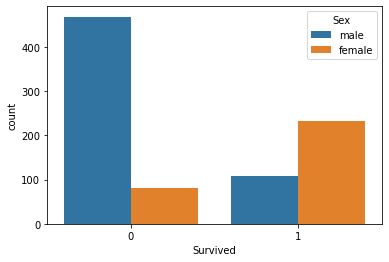

In [12]:
import seaborn as sns
sns.countplot(x=train['Survived'], hue=train['Sex'])

<AxesSubplot:>

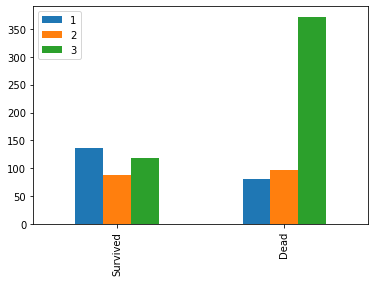

In [13]:
# 객실등급(Pclass)에 따른 생존여부
s = train[train['Survived']==1]['Pclass'].value_counts()
d = train[train['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df.plot(kind='bar')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

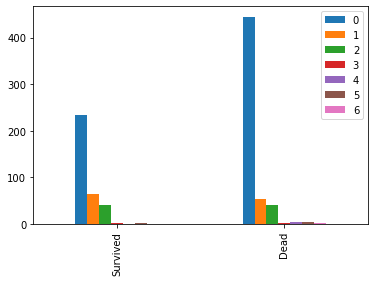

In [15]:
s = train[train['Survived']==1]['Parch'].value_counts()
d = train[train['Survived']==0]['Parch'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df.plot(kind='bar')

In [16]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# 변수를 제거
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [18]:
test = test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [19]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [20]:
train['Age'].isnull().sum()

177

In [21]:
# 성별에 따른 나이의 중간값으로 대체(결측치 처리)
train.groupby('Sex')['Age'].transform('median')
train['Age'].fillna(train.groupby('Sex')['Age'].transform('median'), inplace=True)
train['Age'].isnull().sum()

0

In [22]:
test['Age'].fillna(test.groupby('Sex')['Age'].transform('median'), inplace=True)
test['Age'].isnull().sum()

0

In [23]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [24]:
train['Age'].describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
train['Age'].value_counts()

29.00    144
27.00     71
24.00     30
22.00     27
18.00     26
        ... 
55.50      1
66.00      1
70.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [27]:
# 함수를 이용해서 Age를 범위값으로 변경
def ageTransform(v):
    category = 0
    if v <= 15: category = 0
    elif v <= 20: category = 1
    elif v <= 25: category = 2
    elif v <= 30: category = 3
    elif v <= 35: category = 4
    elif v <= 50: category = 5
    else : category = 6
    return category

In [28]:
train['Age']=train['Age'].apply(ageTransform)

In [29]:
test['Age']=test['Age'].apply(ageTransform)

In [30]:
train['Age'].value_counts()

3    285
5    153
2    122
1     96
4     88
0     83
6     64
Name: Age, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

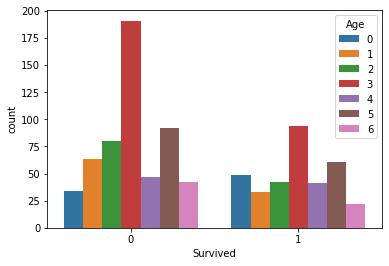

In [31]:
sns.countplot(x=train['Survived'], hue=train['Age'])

In [32]:
# 성별전처리
# male : 0 , female : 1
mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(mapping)

In [33]:
mapping = {'male':0, 'female':1}
test['Sex'] = test['Sex'].map(mapping)

In [34]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [35]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.047714,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.322998,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.079642,0.114631,0.245489,0.182333
Age,-0.047714,-0.322998,-0.079642,1.000000,-0.226106,-0.153641,0.096701
SibSp,-0.035322,0.083081,0.114631,-0.226106,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.153641,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096701,0.159651,0.216225,1.000000


In [36]:
# 자료형 변환
# Age의 자료형 float64 -> int64
train['Age'] = train['Age'].astype('int64')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [38]:
# Embarked 결측치 처리
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
train['Embarked'].isnull().sum()

2

In [40]:
# 탑승항구 결측치는 가장 갯수가 많은 S로 대체
train['Embarked'] = train['Embarked'].fillna('S')

In [41]:
mapping = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(mapping)

In [42]:
mapping = {'S':0, 'C':1, 'Q':2}
test['Embarked'] = test['Embarked'].map(mapping)

In [43]:
test['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [44]:
# 요금
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [45]:
# 요금 범위
# <=7, <=15, <=30, <=45, <=60, <=100, 나머지
def fareTransform(v):
    c = 0
    if v <= 7 : c = 0
    elif v <= 15 : c=1
    elif v <= 30 : c=2
    elif v <= 45 : c=3
    elif v <= 60 : c=4
    elif v <= 100 : c=5
    else : c=6
    return c

In [46]:
train['Fare'] = train['Fare'].apply(fareTransform)
test['Fare'] = test['Fare'].apply(fareTransform)

In [47]:
train['Fare'].value_counts()

1    430
2    199
5     69
3     63
6     53
4     49
0     28
Name: Fare, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

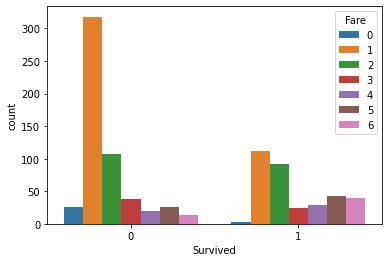

In [48]:
sns.countplot(x=train['Survived'], hue=train['Fare'])

In [49]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,5,1
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,4,0
4,0,3,"Allen, Mr. William Henry",0,4,0,0,1,0


In [50]:
train['Name'] = train['Name'].str.extract(' ([A-Za-z]+)\.')

In [51]:
test['Name'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

In [52]:
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Countess      1
Sir           1
Lady          1
Mme           1
Jonkheer      1
Don           1
Capt          1
Name: Name, dtype: int64

In [53]:
# 성별과 호칭 크로스 비교
pd.crosstab(train['Name'], train['Sex'])

Sex,0,1
Name,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [54]:
# Ms,Mlle,Mme -> Miss 치환
train['Name'] = train['Name'].str.replace('Ms', 'Miss')
train['Name'] = train['Name'].str.replace('Mlle', 'Miss')
train['Name'] = train['Name'].str.replace('Mme', 'Miss')

In [55]:
test['Name'] = test['Name'].str.replace('Ms', 'Miss')
test['Name'] = test['Name'].str.replace('Mlle', 'Miss')
test['Name'] = test['Name'].str.replace('Mme', 'Miss')

In [56]:
train['Name'].value_counts()

Mr          517
Miss        186
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Capt          1
Countess      1
Lady          1
Sir           1
Jonkheer      1
Don           1
Name: Name, dtype: int64

In [57]:
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [58]:
# Countess, Lady, Sir -> 성공
# Capt, Don, Jonkheer, Rev -> 실패
# Col, Dr, Major, Master -> 중간
train['Name'] = train['Name'].replace(['Countess','Lady','Sir'], 'Suc')
train['Name'] = train['Name'].replace(['Capt','Don','Jonkheer','Rev'], 'Fail')
train['Name'] = train['Name'].replace(['Col','Dr','Major','Master'], 'Med')

In [59]:
test['Name'] = test['Name'].replace(['Countess','Lady','Sir'], 'Suc')
test['Name'] = test['Name'].replace(['Capt','Don','Jonkheer','Rev'], 'Fail')
test['Name'] = test['Name'].replace(['Col','Dr','Major','Master'], 'Med')

In [60]:
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
Fail,0.000000
Med,0.549020
Miss,0.704301
Mr,0.156673
Mrs,0.792000
Suc,1.000000


In [61]:
mapping = {'Fail':0, 'Mr':1, 'Med':2, 'Miss':3, 'Mrs':4, 'Suc':5}
train['Name'] = train['Name'].map(mapping)
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
0,0.000000
1,0.156673
2,0.549020
3,0.704301
4,0.792000
5,1.000000


In [62]:
mapping = {'Fail':0, 'Mr':1, 'Med':2, 'Miss':3, 'Mrs':4, 'Suc':5}
test['Name'] = test['Name'].map(mapping)

In [63]:
test['Name'].value_counts()

1.0    240
3.0     79
4.0     72
2.0     24
0.0      2
Name: Name, dtype: int64

In [64]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,2,1,0,1,0
1,1,1,4,1,5,1,0,5,1
2,1,3,3,1,3,0,0,1,0
3,1,1,4,1,4,1,0,4,0
4,0,3,1,0,4,0,0,1,0


In [65]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,0,4,0,0,1,2
1,3,4.0,1,5,1,0,0,0
2,2,1.0,0,6,0,0,1,2
3,3,1.0,0,3,0,0,1,0
4,3,4.0,1,2,1,1,1,0


In [66]:
# 원핫인코딩
sex = pd.get_dummies(train['Sex'])
sex.columns = ['M','F']
train = pd.concat([train, sex], axis=1)

In [67]:
sex = pd.get_dummies(test['Sex'])
sex.columns = ['M','F']
test = pd.concat([test, sex], axis=1)

In [68]:
em = pd.get_dummies(train['Embarked'])
em.columns = ['S','Q','C']
train = pd.concat([train, em], axis=1)

In [69]:
em = pd.get_dummies(test['Embarked'])
em.columns = ['S','Q','C']
test = pd.concat([test, em], axis=1)

In [70]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,M,F,S,Q,C
0,0,3,1,0,2,1,0,1,0,1,0,1,0,0
1,1,1,4,1,5,1,0,5,1,0,1,0,1,0
2,1,3,3,1,3,0,0,1,0,0,1,1,0,0
3,1,1,4,1,4,1,0,4,0,0,1,1,0,0
4,0,3,1,0,4,0,0,1,0,1,0,1,0,0


In [71]:
# 원핫인코딩 후 기존 컬럼 삭제
train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [72]:
test.drop(['Sex','Embarked'], axis=1, inplace=True)

In [73]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,M,F,S,Q,C
0,0,3,1,2,1,0,1,1,0,1,0,0
1,1,1,4,5,1,0,5,0,1,0,1,0
2,1,3,3,3,0,0,1,0,1,1,0,0
3,1,1,4,4,1,0,4,0,1,1,0,0
4,0,3,1,4,0,0,1,1,0,1,0,0


In [74]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,M,F,S,Q,C
0,3,1.0,4,0,0,1,1,0,0,0,1
1,3,4.0,5,1,0,0,0,1,1,0,0
2,2,1.0,6,0,0,1,1,0,0,0,1
3,3,1.0,3,0,0,1,1,0,1,0,0
4,3,4.0,2,1,1,1,0,1,1,0,0


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Name      891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   M         891 non-null    uint8
 8   F         891 non-null    uint8
 9   S         891 non-null    uint8
 10  Q         891 non-null    uint8
 11  C         891 non-null    uint8
dtypes: int64(7), uint8(5)
memory usage: 53.2 KB


In [76]:
y_train = train.values[:,[0]]

In [77]:
x_train = train.values[:,[1,2,3,4,5,6,7,8,9,10,11]]

In [78]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split

In [79]:
train_x, valid_x, train_y, valid_y = train_test_split(x_train, y_train, test_size = 0.2, random_state=11)

In [80]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((712, 11), (179, 11), (712, 1), (179, 1))

In [81]:
train_x = train_x.reshape(train_x.shape[0],11)/255
valid_x = valid_x.reshape(valid_x.shape[0],11)/255


In [82]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((712, 11), (179, 11), (712, 1), (179, 1))

In [83]:
import tensorflow as tf

In [84]:
# label(정답)의 categorical값 -> 원핫인코딩
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)


In [85]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [86]:
tf.random.set_seed(11)

# 모델 구현
model = Sequential() 

model.add(Dense(255, activation='relu', input_shape=(11,)))

# 레이어 추가
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 255)               3060      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8192      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 13,430
Trainable params: 13,430
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(train_x, train_y, epochs=500, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/500
8/8 [==============================] - 3s 332ms/step - loss: 0.9977 - accuracy: 0.3943 - val_loss: 0.9639 - val_accuracy: 0.3408
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 0.9007 - accuracy: 0.3821 - val_loss: 0.8486 - val_accuracy: 0.3408
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7876 - accuracy: 0.4036 - val_loss: 0.7489 - val_accuracy: 0.3408
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7195 - accuracy: 0.4033 - val_loss: 0.6747 - val_accuracy: 0.6592
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6761 - accuracy: 0.6111 - val_loss: 0.6429 - val_accuracy: 0.6592
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6775 - accuracy: 0.5960 - val_loss: 0.6405 - val_accuracy: 0.6592
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6836 - accuracy: 0.5909 - val_loss: 0.6409 - val_accuracy: 0.6592
Epoch 8/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.8032 - val_loss: 0.3861 - val_accuracy: 0.8492
Epoch 60/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.7848 - val_loss: 0.3721 - val_accuracy: 0.8492
Epoch 61/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.7867 - val_loss: 0.3707 - val_accuracy: 0.8492
Epoch 62/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4345 - accuracy: 0.8136 - val_loss: 0.3917 - val_accuracy: 0.8436
Epoch 63/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4755 - accuracy: 0.7807 - val_loss: 0.3685 - val_accuracy: 0.8547
Epoch 64/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 0.8113 - val_loss: 0.4076 - val_accuracy: 0.8380
Epoch 65/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4580 - accuracy: 0.7853 - val_loss: 0.3680 - val_accuracy: 0.8547
Epoch 66/500
8/8 [===============

8/8 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.7856 - val_loss: 0.3631 - val_accuracy: 0.8492
Epoch 118/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4716 - accuracy: 0.7665 - val_loss: 0.3559 - val_accuracy: 0.8547
Epoch 119/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4697 - accuracy: 0.7852 - val_loss: 0.3615 - val_accuracy: 0.8492
Epoch 120/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4832 - accuracy: 0.7534 - val_loss: 0.3562 - val_accuracy: 0.8547
Epoch 121/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4591 - accuracy: 0.8014 - val_loss: 0.3550 - val_accuracy: 0.8547
Epoch 122/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4451 - accuracy: 0.8003 - val_loss: 0.3608 - val_accuracy: 0.8492
Epoch 123/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4412 - accuracy: 0.8034 - val_loss: 0.3574 - val_accuracy: 0.8547
Epoch 124/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.4405 - accuracy: 0.7992 - val_loss: 0.3709 - val_accuracy: 0.8380
Epoch 176/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4515 - accuracy: 0.7784 - val_loss: 0.3536 - val_accuracy: 0.8603
Epoch 177/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 0.7907 - val_loss: 0.3650 - val_accuracy: 0.8492
Epoch 178/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4536 - accuracy: 0.7822 - val_loss: 0.3537 - val_accuracy: 0.8603
Epoch 179/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4422 - accuracy: 0.7987 - val_loss: 0.3565 - val_accuracy: 0.8547
Epoch 180/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4286 - accuracy: 0.8117 - val_loss: 0.3504 - val_accuracy: 0.8547
Epoch 181/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4533 - accuracy: 0.7849 - val_loss: 0.3533 - val_accuracy: 0.8547
Epoch 182/500
8/8 [========

8/8 [==============================] - 0s 9ms/step - loss: 0.4504 - accuracy: 0.7994 - val_loss: 0.3493 - val_accuracy: 0.8603
Epoch 234/500
8/8 [==============================] - 0s 9ms/step - loss: 0.4476 - accuracy: 0.7974 - val_loss: 0.3534 - val_accuracy: 0.8547
Epoch 235/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4391 - accuracy: 0.7931 - val_loss: 0.3524 - val_accuracy: 0.8547
Epoch 236/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4553 - accuracy: 0.7845 - val_loss: 0.3476 - val_accuracy: 0.8715
Epoch 237/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4400 - accuracy: 0.8135 - val_loss: 0.3518 - val_accuracy: 0.8547
Epoch 238/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4554 - accuracy: 0.7878 - val_loss: 0.3479 - val_accuracy: 0.8659
Epoch 239/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4271 - accuracy: 0.8099 - val_loss: 0.3525 - val_accuracy: 0.8547
Epoch 240/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.4335 - accuracy: 0.7961 - val_loss: 0.3464 - val_accuracy: 0.8715
Epoch 292/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4498 - accuracy: 0.7984 - val_loss: 0.3480 - val_accuracy: 0.8659
Epoch 293/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4728 - accuracy: 0.7877 - val_loss: 0.3481 - val_accuracy: 0.8659
Epoch 294/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4395 - accuracy: 0.8007 - val_loss: 0.3519 - val_accuracy: 0.8547
Epoch 295/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.7850 - val_loss: 0.3461 - val_accuracy: 0.8659
Epoch 296/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4404 - accuracy: 0.7961 - val_loss: 0.3488 - val_accuracy: 0.8659
Epoch 297/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4450 - accuracy: 0.7910 - val_loss: 0.3497 - val_accuracy: 0.8659
Epoch 298/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.4322 - accuracy: 0.8077 - val_loss: 0.3583 - val_accuracy: 0.8603
Epoch 350/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4336 - accuracy: 0.8107 - val_loss: 0.3475 - val_accuracy: 0.8659
Epoch 351/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4196 - accuracy: 0.8205 - val_loss: 0.3483 - val_accuracy: 0.8603
Epoch 352/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4457 - accuracy: 0.7885 - val_loss: 0.3453 - val_accuracy: 0.8659
Epoch 353/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4276 - accuracy: 0.8028 - val_loss: 0.3483 - val_accuracy: 0.8659
Epoch 354/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 0.7993 - val_loss: 0.3485 - val_accuracy: 0.8659
Epoch 355/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.8217 - val_loss: 0.3504 - val_accuracy: 0.8659
Epoch 356/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.4356 - accuracy: 0.7895 - val_loss: 0.3518 - val_accuracy: 0.8659
Epoch 408/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4221 - accuracy: 0.8158 - val_loss: 0.3551 - val_accuracy: 0.8715
Epoch 409/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4510 - accuracy: 0.8017 - val_loss: 0.3504 - val_accuracy: 0.8715
Epoch 410/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4339 - accuracy: 0.8124 - val_loss: 0.3509 - val_accuracy: 0.8659
Epoch 411/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4366 - accuracy: 0.7999 - val_loss: 0.3487 - val_accuracy: 0.8715
Epoch 412/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4324 - accuracy: 0.8108 - val_loss: 0.3492 - val_accuracy: 0.8715
Epoch 413/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4310 - accuracy: 0.7998 - val_loss: 0.3621 - val_accuracy: 0.8659
Epoch 414/500
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.4167 - accuracy: 0.8181 - val_loss: 0.3412 - val_accuracy: 0.8715
Epoch 466/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4254 - accuracy: 0.8213 - val_loss: 0.3531 - val_accuracy: 0.8659
Epoch 467/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4136 - accuracy: 0.8192 - val_loss: 0.3448 - val_accuracy: 0.8771
Epoch 468/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4206 - accuracy: 0.8237 - val_loss: 0.3433 - val_accuracy: 0.8771
Epoch 469/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4390 - accuracy: 0.8072 - val_loss: 0.3537 - val_accuracy: 0.8883
Epoch 470/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4274 - accuracy: 0.7987 - val_loss: 0.3476 - val_accuracy: 0.8603
Epoch 471/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4524 - accuracy: 0.7916 - val_loss: 0.3471 - val_accuracy: 0.8771
Epoch 472/500
8/8 [========

In [88]:
# 테스트데이터 평가
# 손실값, 정확도
model.evaluate(valid_x, valid_y)

6/6 [==============================] - 0s 798us/step - loss: 0.3532 - accuracy: 0.8827


[0.3532065153121948, 0.8826815485954285]

In [89]:
history.history

{'loss': [0.9812817573547363,
  0.8742429614067078,
  0.7803021669387817,
  0.7110156416893005,
  0.6759476661682129,
  0.6730344295501709,
  0.6744901537895203,
  0.6705367565155029,
  0.6695905327796936,
  0.6694276332855225,
  0.668700098991394,
  0.6681638360023499,
  0.6682552695274353,
  0.6679477691650391,
  0.6693524718284607,
  0.6683436036109924,
  0.6686474084854126,
  0.6659572124481201,
  0.6644483804702759,
  0.6646568775177002,
  0.6631481051445007,
  0.6636710166931152,
  0.6618180274963379,
  0.6620326638221741,
  0.6607463955879211,
  0.6595914363861084,
  0.6582231521606445,
  0.6567280292510986,
  0.6527805328369141,
  0.6504923105239868,
  0.6470178961753845,
  0.643044650554657,
  0.6376745104789734,
  0.6340063214302063,
  0.6257927417755127,
  0.6194101572036743,
  0.6069632768630981,
  0.5992955565452576,
  0.5826854109764099,
  0.5652189254760742,
  0.5480325818061829,
  0.5333597660064697,
  0.5205910205841064,
  0.5049982666969299,
  0.49784988164901733,
  0

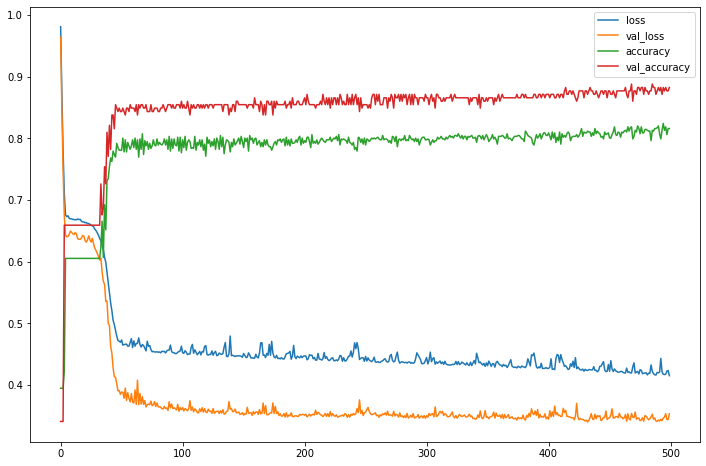

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()